In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# read train file
df = pd.read_csv('train_black_friday.csv')
df_original = df.copy()

# read test file
df_test = pd.read_csv('test_black_friday.csv')
df_test_original = df_test.copy()

In [3]:
# visualize the data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# check how many records are we dealing with
df.shape

(550068, 12)

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# lets check value_counts for the categorical features
print('Age: \n', df.Age.value_counts())
print()
print('Occupation: \n', df.Occupation.value_counts())
print()
print('City Category: \n', df.City_Category.value_counts())
print()
print('Stay In Current City for Years: \n', df.Stay_In_Current_City_Years.value_counts())

Age: 
 26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Occupation: 
 4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

City Category: 
 B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Stay In Current City for Years: 
 1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


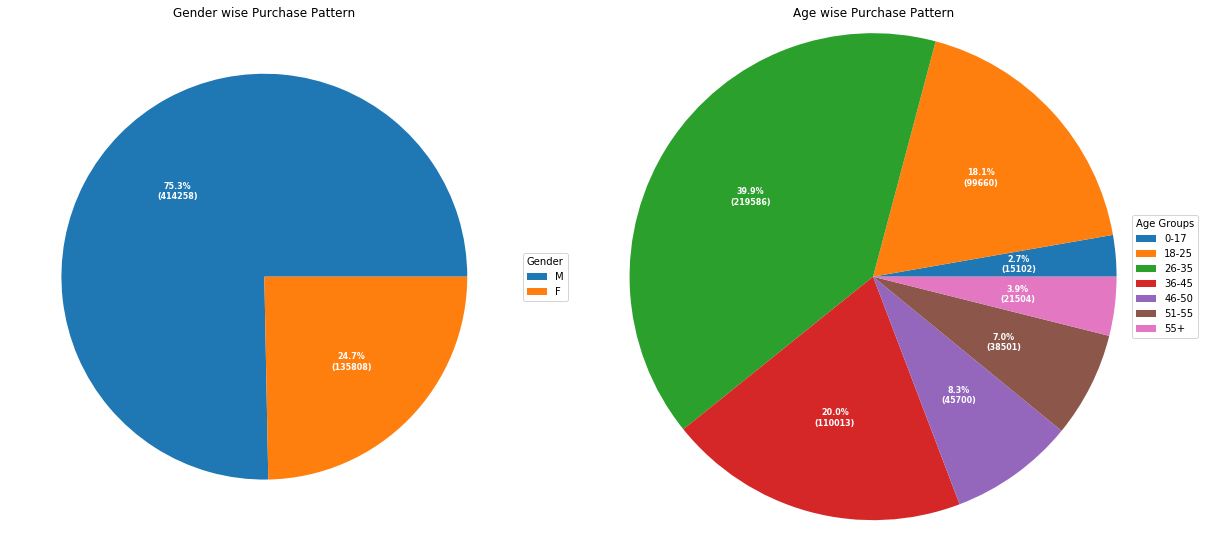

In [7]:
# Visualize the Purchase for each feature in a nutshell 

# Gender Stats
labels_gender = df['Gender'].value_counts().index.tolist()
sizes_gender = df['Gender'].value_counts().values.tolist()
# Age Stats
labels_age = df['Age'].value_counts().sort_index().index.tolist()
sizes_age = df['Age'].value_counts().sort_index().values.tolist()

figure, axes = plt.subplots(1, 2, figsize=(20, 20), sharey=False, sharex = False, subplot_kw=dict(aspect="equal"))

def func(pct, sizes):
    absolute = int(pct/100.*np.sum(sizes))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Gender chart
wedges, texts, autotexts = axes[0].pie(sizes_gender, autopct=lambda pct: func(pct, sizes_gender),
                                  textprops=dict(color="w"), radius=1)
axes[0].legend(wedges, labels_gender,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
axes[0].set_title("Gender wise Purchase Pattern")

# Age chart
wedges, texts, autotexts = axes[1].pie(sizes_age, autopct=lambda pct: func(pct, sizes_age),
                                  textprops=dict(color="w"), radius=1.2)
axes[1].legend(wedges, labels_age,
          title="Age Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
axes[1].set_title("Age wise Purchase Pattern")

plt.show()

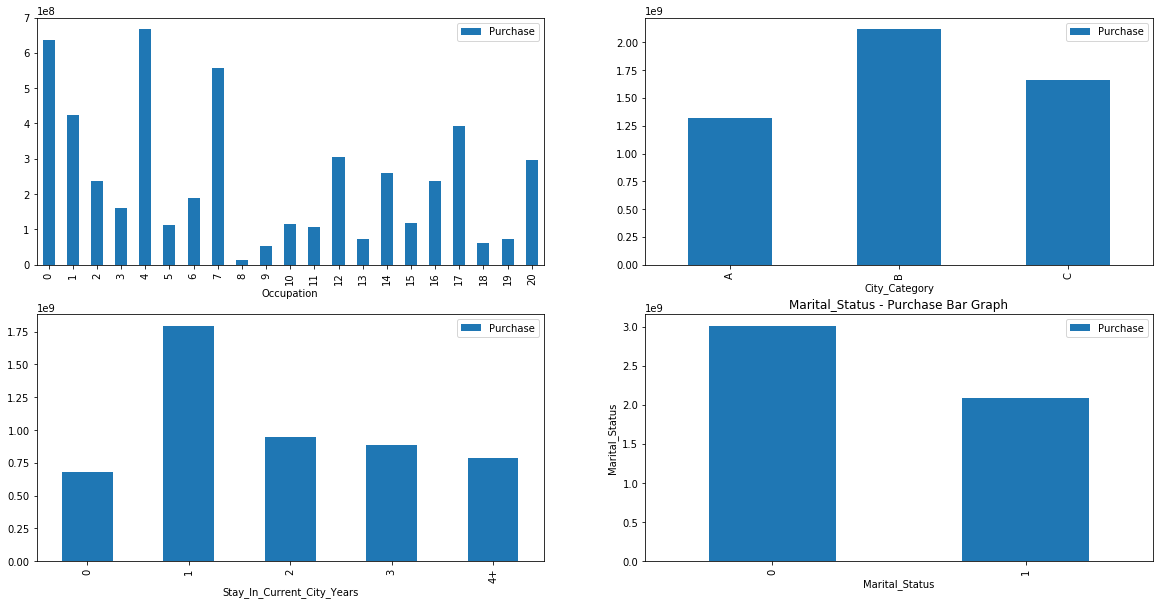

In [9]:
# Charts for Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status for Purchase pattern,Product_Category_1,
# Product_Category_2,Product_Category_3

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

# Occupation chart
stats = pd.DataFrame(df.groupby('Occupation').sum()['Purchase'])
stats.plot(ax=axes[0,0], kind='bar')
plt.ylabel('Purchase')
plt.title('Occupation - Purchase Bar Graph')

#City_Category
stats = pd.DataFrame(df.groupby('City_Category').sum()['Purchase'])
stats.plot(ax=axes[0,1], kind='bar')
plt.ylabel('City_Category')
plt.title('City_Category - Purchase Bar Graph')

#Stay_In_Current_City_Years
stats = pd.DataFrame(df.groupby('Stay_In_Current_City_Years').sum()['Purchase'])
stats.plot(ax=axes[1,0], kind='bar')
plt.ylabel('Stay_In_Current_City_Years')
plt.title('Stay_In_Current_City_Years - Purchase Bar Graph')

#Marital_Status
stats = pd.DataFrame(df.groupby('Marital_Status').sum()['Purchase'])
stats.plot(ax=axes[1,1], kind='bar')
plt.ylabel('Marital_Status')
plt.title('Marital_Status - Purchase Bar Graph')

plt.show()

                      Purchase
Product_Category_1            
1                   1910013754
5                    941835229
8                    854318799
6                    324150302
2                    268516186
3                    204084713
16                   145120612
11                   113791115
10                   100837301
15                    92969042                      Purchase
Product_Category_2           
2.0                 670303864
8.0                 658392656
16.0                445339722
15.0                392067176
14.0                391556939
4.0                 262295485
5.0                 236844899
6.0                 189417477
11.0                126366165
17.0                125495400                      Purchase
Product_Category_3           
16.0                391040983
15.0                345662769
5.0                 201858094
17.0                196581588
14.0                185249212
8.0                 163619031
9.0                 12078862

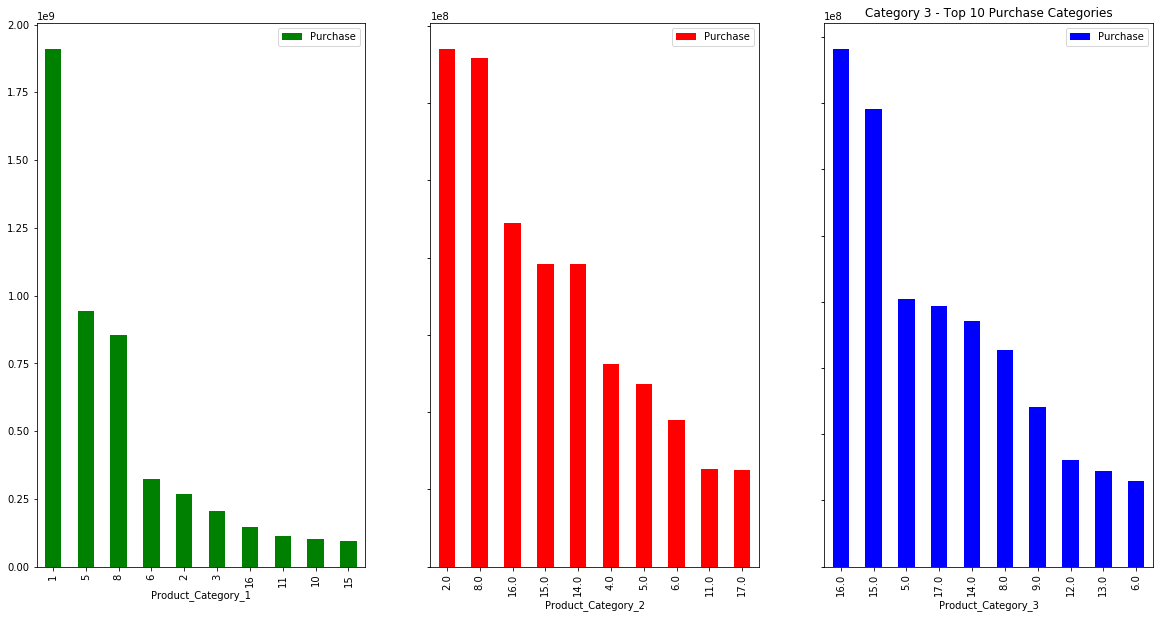

In [10]:
# Top 10 Revenue generating Categories: Product_Category_1, Product_Category_2,Product_Category_3
stats_cat1 = pd.DataFrame(df.groupby('Product_Category_1').sum()['Purchase'])
cat1_top10 = stats_cat1.sort_values(by='Purchase', ascending=False).head(10)
stats_cat2 = pd.DataFrame(df.groupby('Product_Category_2').sum()['Purchase'])
cat2_top10 = stats_cat2.sort_values(by='Purchase', ascending=False).head(10)
stats_cat3 = pd.DataFrame(df.groupby('Product_Category_3').sum()['Purchase'])
cat3_top10 = stats_cat3.sort_values(by='Purchase', ascending=False).head(10)

print(cat1_top10, cat2_top10, cat3_top10)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

# Product Category 1 chart
cat1_top10.plot(sharey=True, ax=axes[0], kind='bar', color='green')
plt.ylabel('Purchase')
plt.title('Category 1 - Top 10 Purchase Categories')

# Product Category 2 chart
cat2_top10.plot(sharey=True, ax=axes[1], kind='bar', color='red')
plt.ylabel('Purchase')
plt.title('Category 2 - Top 10 Purchase Categories')

# Product Category 3 chart
cat3_top10.plot(sharey=True, ax=axes[2], kind='bar', color='blue')
plt.ylabel('Purchase')
plt.title('Category 3 - Top 10 Purchase Categories')

plt.show()

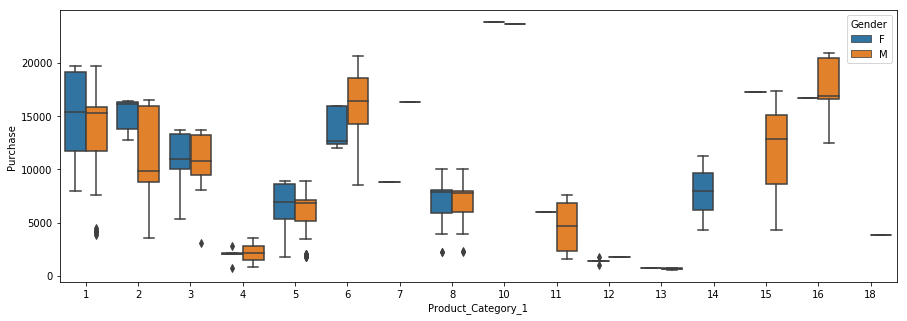

In [11]:
# Gender wise purchase of Category 1 
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(500)
sns.boxplot(x="Product_Category_1", y="Purchase", hue="Gender", data=partial_df);

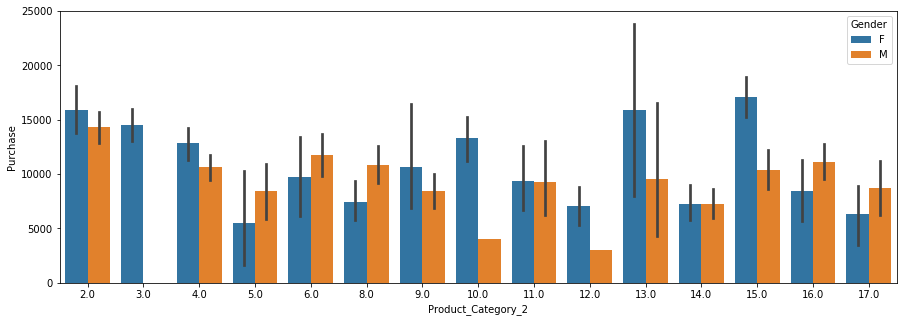

In [12]:
# Gender wise purchase of Category 2
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(500)
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data=partial_df);

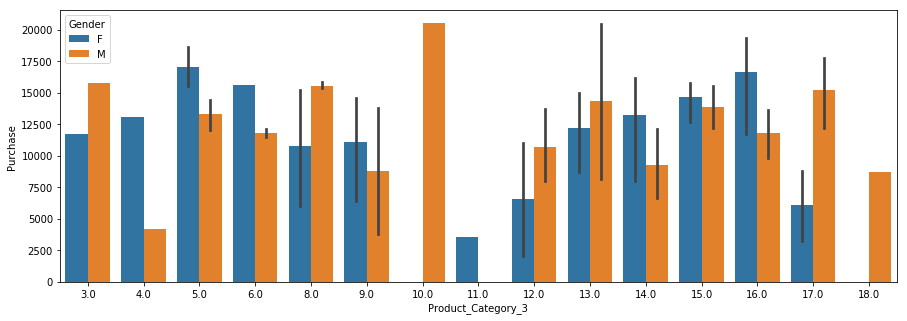

In [13]:
# Gender wise purchase of Category 3
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(500)
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender", data=partial_df);

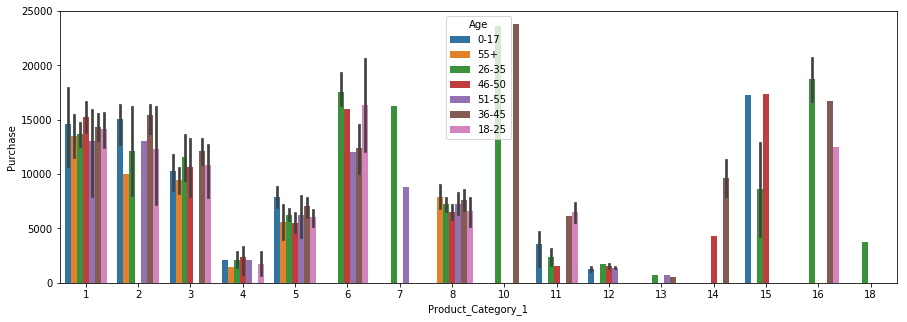

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(500)
sns.barplot(x="Product_Category_1", y="Purchase", hue="Age", data=partial_df);

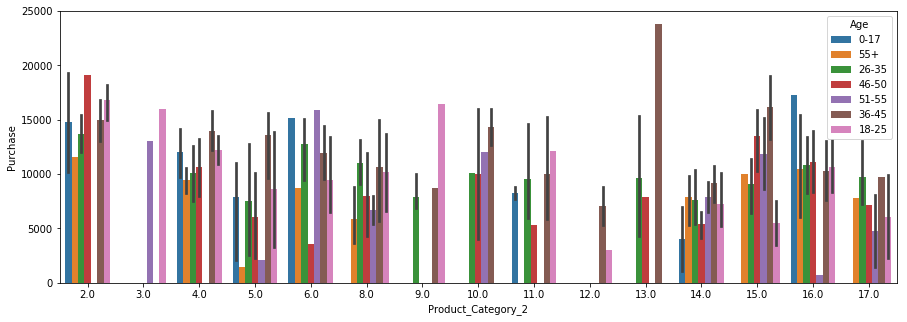

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(500)
sns.barplot(x="Product_Category_2", y="Purchase", hue="Age", data=partial_df);

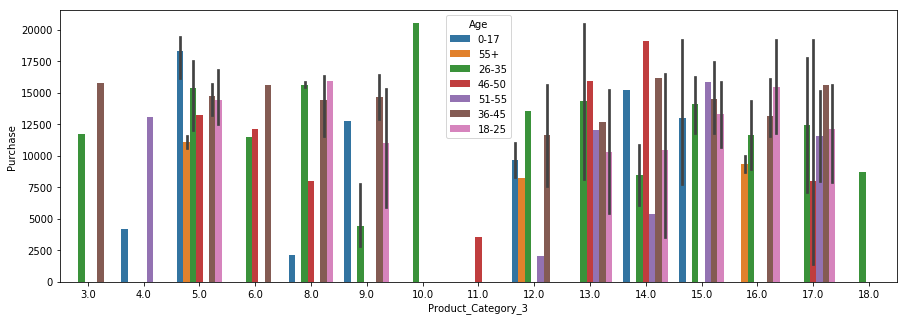

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(500)
sns.barplot(x="Product_Category_3", y="Purchase", hue="Age", data=partial_df);

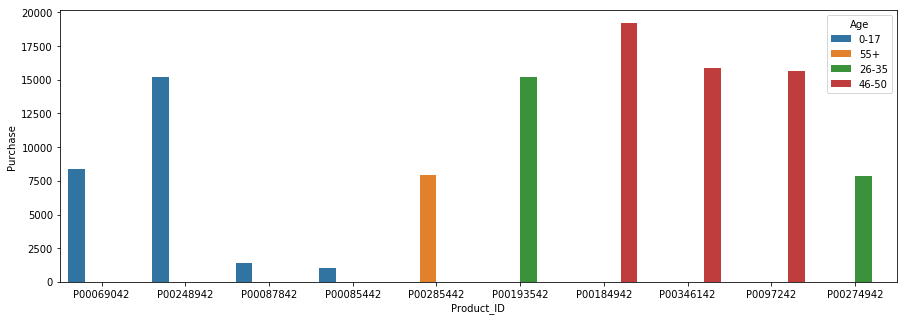

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(10)
sns.barplot(x="Product_ID", y="Purchase", hue="Age", data=partial_df);

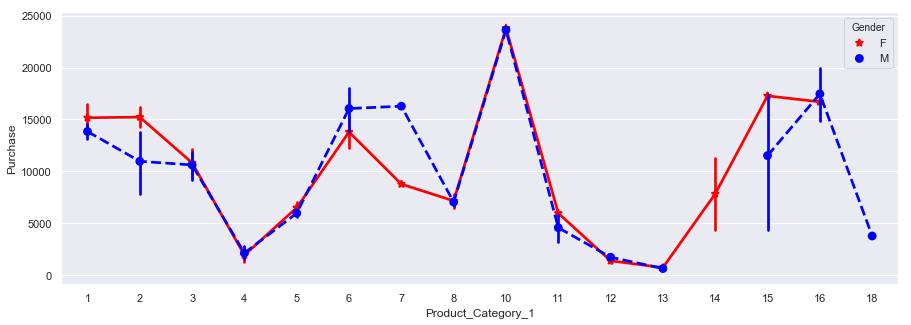

In [18]:
partial_df = df.head(500)
sns.set(rc={'figure.figsize':(15,5)})
sns.pointplot(x="Product_Category_1", y="Purchase", hue="Gender", data=partial_df,
              palette={"M": "blue", "F": "red"},
              markers=["*", "o"], linestyles=["-", "--"]);

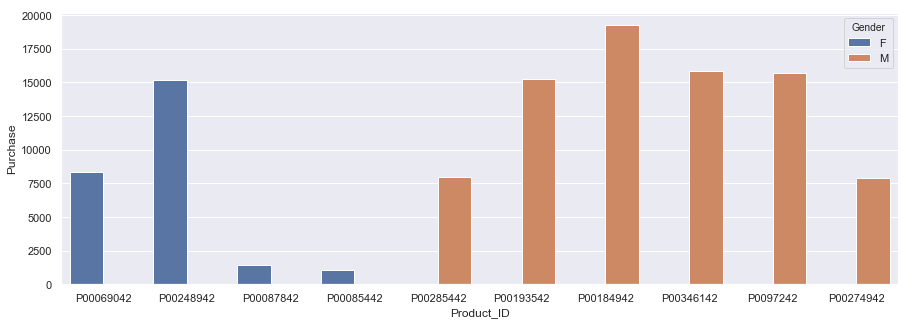

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(10)
sns.barplot(x="Product_ID", y="Purchase", hue="Gender", data=partial_df);

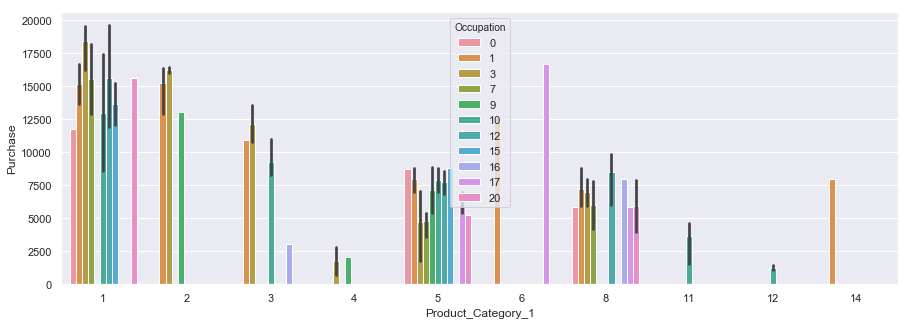

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(100)
sns.barplot(x="Product_Category_1", y="Purchase", hue="Occupation", data=partial_df);

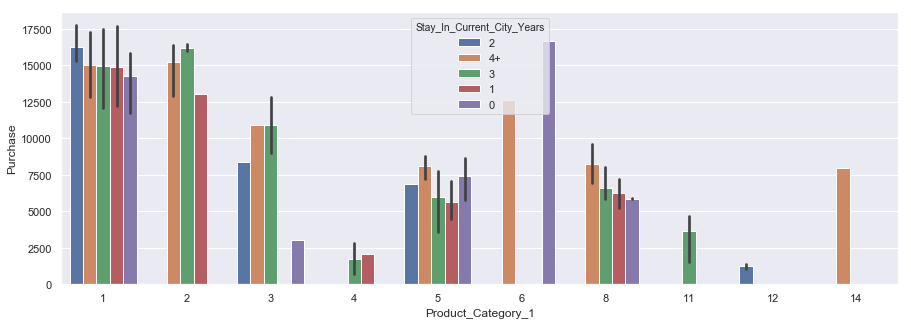

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(100)
sns.barplot(x="Product_Category_1", y="Purchase", hue="Stay_In_Current_City_Years", data=partial_df);

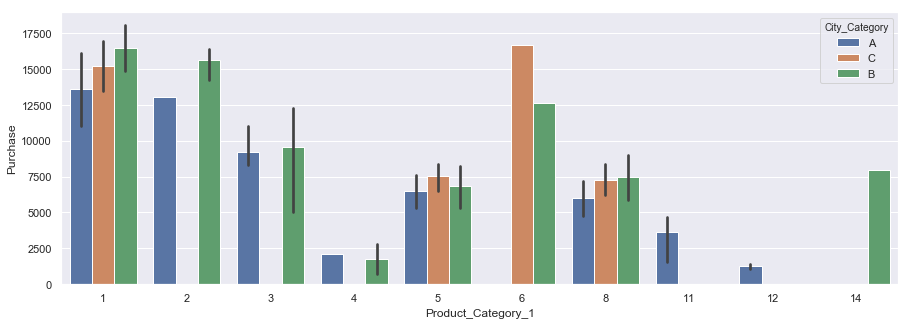

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
partial_df = df.head(100)
sns.barplot(x="Product_Category_1", y="Purchase", hue="City_Category", data=partial_df);

In [23]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [24]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [26]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
df['Product_Category_1'].value_counts().sort_index(ascending=False).head(5)

20    2550
19    1603
18    3125
17     578
16    9828
Name: Product_Category_1, dtype: int64

In [9]:
df[df['Product_Category_1'] == 3].head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
33,1000010,P00058342,F,36-45,1,B,4+,1,3,4.0,NaN,10946
71,1000018,P00190742,F,18-25,3,B,3,0,3,4.0,9.0,10754
79,1000018,P00190042,F,18-25,3,B,3,0,3,4.0,5.0,13551
90,1000019,P00249642,M,0-17,10,A,3,0,3,5.0,NaN,11023


In [10]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

df_test['Product_Category_2'].fillna(0, inplace=True)
df_test['Product_Category_3'].fillna(0, inplace=True)

In [11]:
print(df.Gender.value_counts())
print(df.City_Category.value_counts())
print(df.Stay_In_Current_City_Years.value_counts())

M    414259
F    135809
Name: Gender, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [13]:
from sklearn import preprocessing

def encode_features(df_train, df_test):
    features = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
df, df_test = encode_features(df, df_test)
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


In [14]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [15]:
df['ProductID'] = df['Product_ID'].str[1:]
df['ProductID'] = df['ProductID'].astype(np.int64)

df_test['ProductID'] = df_test['Product_ID'].str[1:]
df_test['ProductID'] = df_test['ProductID'].astype(np.int64)

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,ProductID
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370,69042
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,248942
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422,87842
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057,85442
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969,285442


In [17]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
ProductID                       int64
dtype: object

In [18]:
# lets drop Product_ID (which is already modified as per Model requirement)
# We do not  want our ML model to overfit, hence get rid of User_ID as well
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

# drop columns from df_test
df_test.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

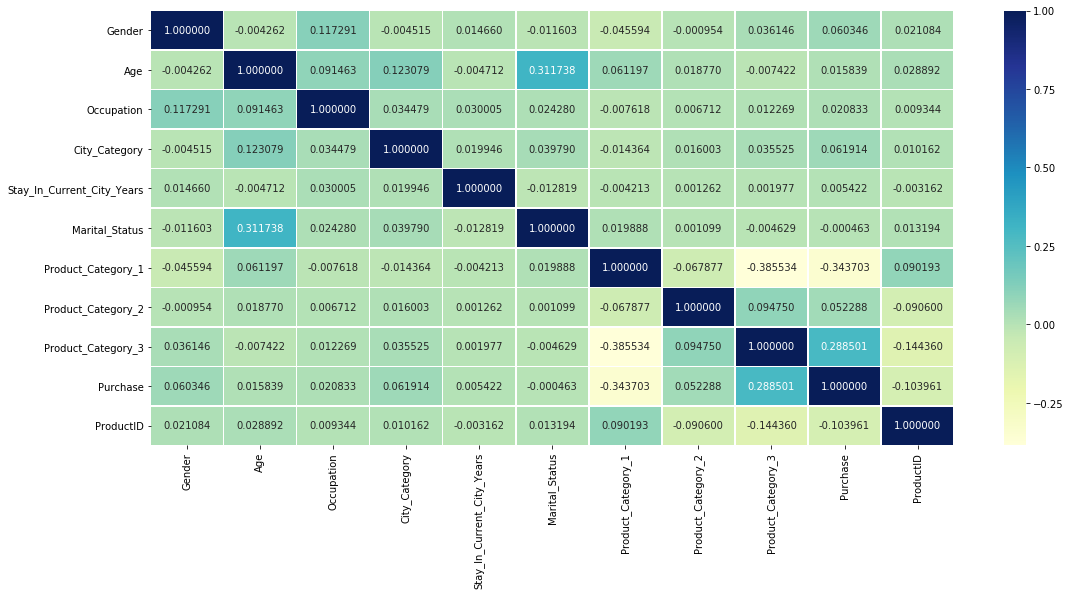

In [19]:
# Find co-relation between each feature
fig, ax = plt.subplots(figsize=(18,8)) # Sample figsize in inches
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt="f", linewidths=.5, ax=ax, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,ProductID
0,0,0,10,0,2,0,3,0.0,0.0,8370,69042
1,0,0,10,0,2,0,1,6.0,14.0,15200,248942
2,0,0,10,0,2,0,12,0.0,0.0,1422,87842
3,0,0,10,0,2,0,12,14.0,0.0,1057,85442
4,1,6,16,2,4,0,8,0.0,0.0,7969,285442


In [21]:
df.shape

(550068, 11)

In [22]:
# Randomize the data
df.reindex(np.random.permutation(df.index))

# split it as per convenience; we can also use train_test_split 
train = df.head(54000)
test_set = df.tail(10068)
test = test_set.head(5034)
validation = test_set.tail(5034)

X_train = train.drop(['Purchase'], axis=1)
y_train = train['Purchase']

X_test = test.drop(['Purchase'], axis=1)
y_test = test['Purchase']

X_validation = validation.drop(['Purchase'], axis=1)
y_validation = validation['Purchase']

print(X_train.shape, y_train.shape, 
      X_test.shape, y_test.shape,
      X_validation.shape, y_validation.shape)

(54000, 10) (54000,) (5034, 10) (5034,) (5034, 10) (5034,)


# Attempt 1 - RandomForestRegressor

In [42]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(n_estimators=100)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
# compare Mean Absolute Error with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_validation, y_train, y_validation):
    model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=max_leaf_nodes, random_state=0, 
                                  oob_score=True, min_samples_leaf = 3, min_samples_split = 3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)
    mae = metrics.mean_absolute_error(y_validation, y_pred)
    return(mae)

for max_leaf_nodes in [5, 300, 550, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_validation, y_train, y_validation)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  10795
Max leaf nodes: 300  		 Mean Absolute Error:  2593
Max leaf nodes: 550  		 Mean Absolute Error:  2592
Max leaf nodes: 850  		 Mean Absolute Error:  2590


In [44]:
# finalize the rfr model with tuned params
rfr = RandomForestRegressor(n_estimators=100, max_leaf_nodes=300, random_state=0, 
                                  oob_score=True, min_samples_leaf = 3, min_samples_split = 5)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_validation)

print('Mean Absolute Error', metrics.mean_absolute_error(y_validation, y_pred))
#print('Mean Squared Error', metrics.mean_squared_error(y_validation, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_validation, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_validation, y_pred))

# apply on test set if satisfied with the score / error rate

Mean Absolute Error 2593.8411592552197
Root Mean Squared Error 2719.0094038667107
Variance score: 0.52
